Heart disease is a prevalent and potentially life-threatening condition that affects millions of individuals worldwide. Early detection and accurate prediction of heart disease risk are crucial for effective preventive measures and timely medical interventions. In this notebook, we'll explore the process of building and evaluating machine learning models for heart disease prediction.

# Dataset Overview
The dataset used in this project contains various clinical and demographic features of individuals, such as age, gender, blood pressure, cholesterol levels, and more. Additionally, it includes information on whether each individual has been diagnosed with heart disease or not. This dataset serves as the foundation for our predictive modeling task.

# Project Objectives
The primary objectives of this project are as follows:

* Data Preprocessing: We'll start by preparing and cleaning the dataset, handling missing values, and encoding categorical variables.
* Exploratory Data Analysis (EDA): We'll perform exploratory data analysis to gain insights into the relationships between different features and the presence of heart disease.
* Feature Selection: We'll use statistical methods to select the most relevant features for our predictive models.
* Model Building: We'll train and evaluate several machine learning models, including Decision Trees, Logistic Regression, Support Vector Machines, Random Forests, and more, to predict heart disease.
* Model Evaluation: We'll assess model performance using various metrics such as accuracy, precision, recall, F1-score, and ROC AUC.
* Hyperparameter Tuning: For the top-performing models, we'll fine-tune hyperparameters to optimize predictive accuracy.
* Cross-Validation: We'll employ cross-validation techniques to ensure the robustness of our models.
* Model Interpretation: We'll interpret the results and gain insights into the most influential factors in heart disease prediction.
By the end of this project, you'll have a well-rounded understanding of the machine learning pipeline for healthcare applications, including data preprocessing, model selection, evaluation, and interpretation.

Let's get started with the first step: data preprocessing.

# Importing Libraries and Loading Data
We start by importing the necessary Python libraries and loading the dataset:

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Initial Dataset Overview
Let's take a first look at the dataset by displaying its top rows and checking its basic information:

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [86]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Target Variable Distribution
Understanding the distribution of the target variable is crucial, as it helps us gauge the balance between classes. In this dataset, we are interested in predicting heart disease presence (1) or absence (0):

In [87]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

# Data Cleaning
In the process of exploring our dataset, we discovered that there are instances with unusual zero values in both blood pressure (RestingBP) and cholesterol (Cholesterol) columns. These zero values could be indicative of missing data or errors in data entry. In this section, we'll address these issues.

## Zero Values in Resting Blood Pressure (RestingBP)
Upon inspecting the dataset, we observed that there are instances with a resting blood pressure value (RestingBP) of 0, which is highly unlikely in a clinical context.

In [88]:
data.loc[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


To maintain data integrity, we've decided to drop rows with zero values in the RestingBP column:

In [89]:
data.drop(data.loc[data['RestingBP'] == 0].index, inplace = True)

## Zero Values in Cholesterol
We also observed that 171 rows in our dataset have a cholesterol (Cholesterol) value equal to 0. This situation might indicate that the cholesterol levels for these individuals were not measured or recorded, and they are assumed to be normal.

To handle this, we'll impute these zero values with a typical value for normal cholesterol levels, such as 180:

In [90]:
data.loc[data['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [91]:
data['Cholesterol'].replace(0, 180, inplace=True)

Let's look our data again.

In [92]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,232.582334,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,58.994791,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,180.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Data Visualization and Exploration
Visualizing and exploring data is an essential step in understanding the underlying patterns and relationships within a dataset. In this section, we'll use various plots to gain insights into our dataset's features and their distributions, especially concerning heart disease.

## Age Distribution by Heart Disease
Let's start by visualizing the distribution of age in our dataset and how it relates to the presence or absence of heart disease:

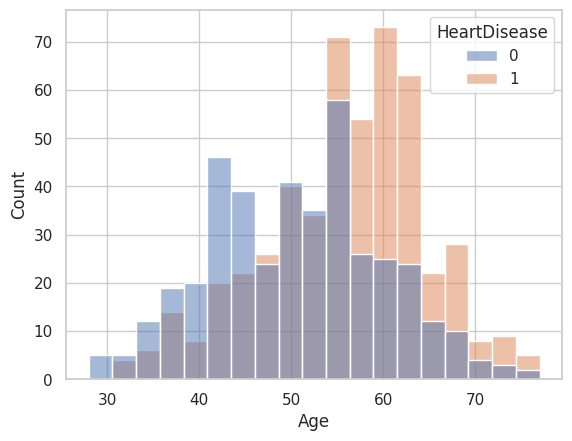

In [93]:
sns.histplot(data=data, x='Age', hue='HeartDisease');

## Distributions of Numeric Features
Next, we'll explore the distributions of key numeric features, such as cholesterol levels (Cholesterol), maximum heart rate (MaxHR), resting blood pressure (RestingBP), and Oldpeak, based on the presence or absence of heart disease:

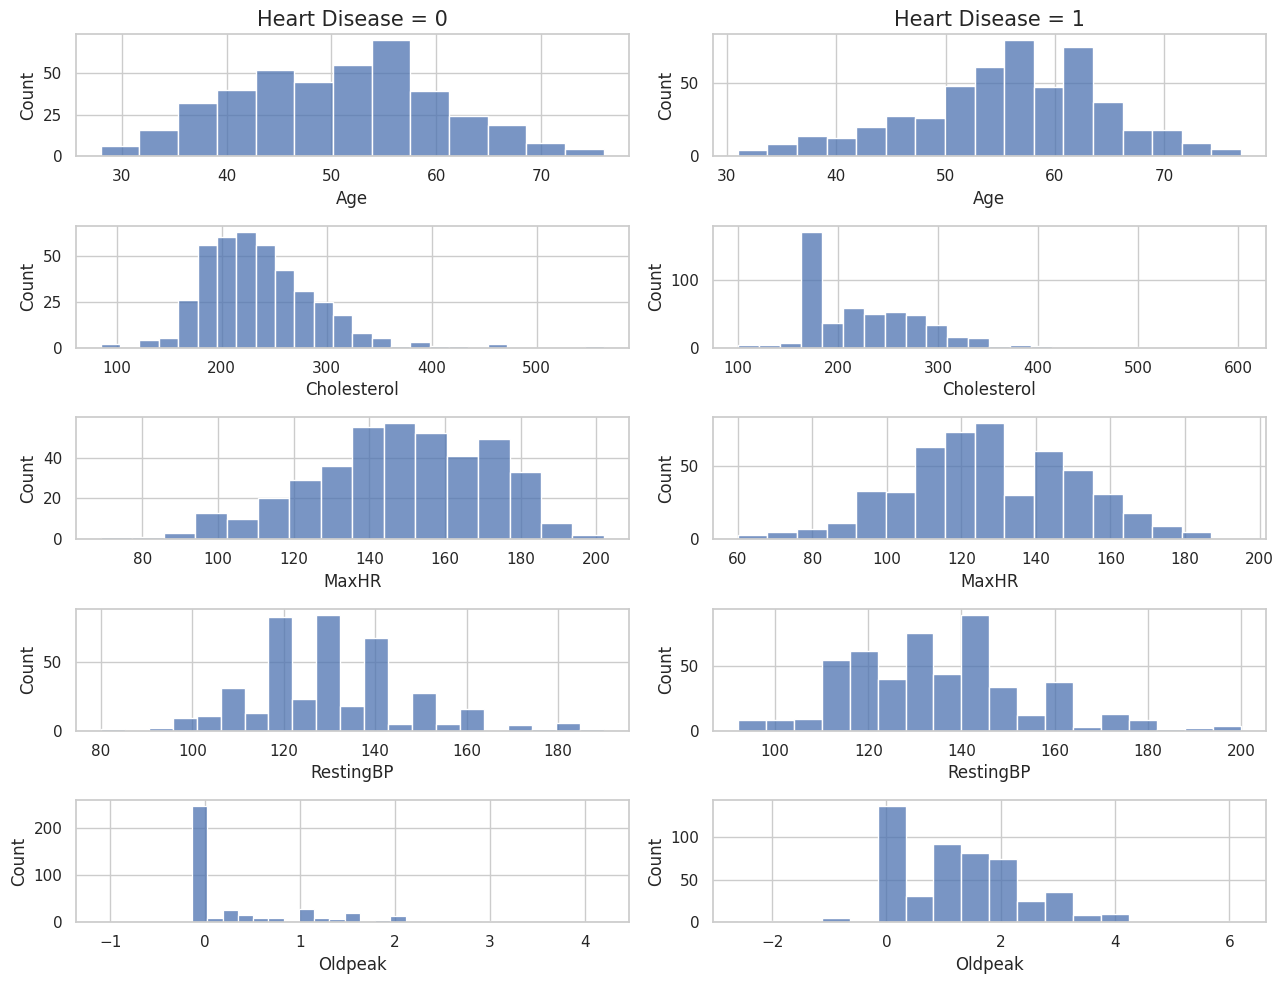

In [94]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(5,2, figsize=(13, 10), tight_layout=True)
fig_1 = sns.histplot(data=data.loc[data['HeartDisease'] == 0], x='Age', ax=ax[0, 0]);
fig_1.set_title('Heart Disease = 0', fontsize=15);
fig_2 = sns.histplot(data=data.loc[data['HeartDisease'] == 1], x='Age', ax=ax[0, 1]);
fig_2.set_title('Heart Disease = 1', fontsize=15);
sns.histplot(data=data.loc[data['HeartDisease'] == 0], x='Cholesterol', ax=ax[1, 0]);
sns.histplot(data=data.loc[data['HeartDisease'] == 1], x='Cholesterol', ax=ax[1, 1]);
sns.histplot(data=data.loc[data['HeartDisease'] == 0], x='MaxHR', ax=ax[2, 0]);
sns.histplot(data=data.loc[data['HeartDisease'] == 1], x='MaxHR', ax=ax[2, 1]);
sns.histplot(data=data.loc[data['HeartDisease'] == 0], x='RestingBP', ax=ax[3, 0]);
sns.histplot(data=data.loc[data['HeartDisease'] == 1], x='RestingBP', ax=ax[3, 1]);
sns.histplot(data=data.loc[data['HeartDisease'] == 0], x='Oldpeak', ax=ax[4, 0]);
sns.histplot(data=data.loc[data['HeartDisease'] == 1], x='Oldpeak', ax=ax[4, 1]);

From the graphs, it seems older age, higher cholesterol, and greater max heart rate/resting BP appear significantly associated with heart disease.

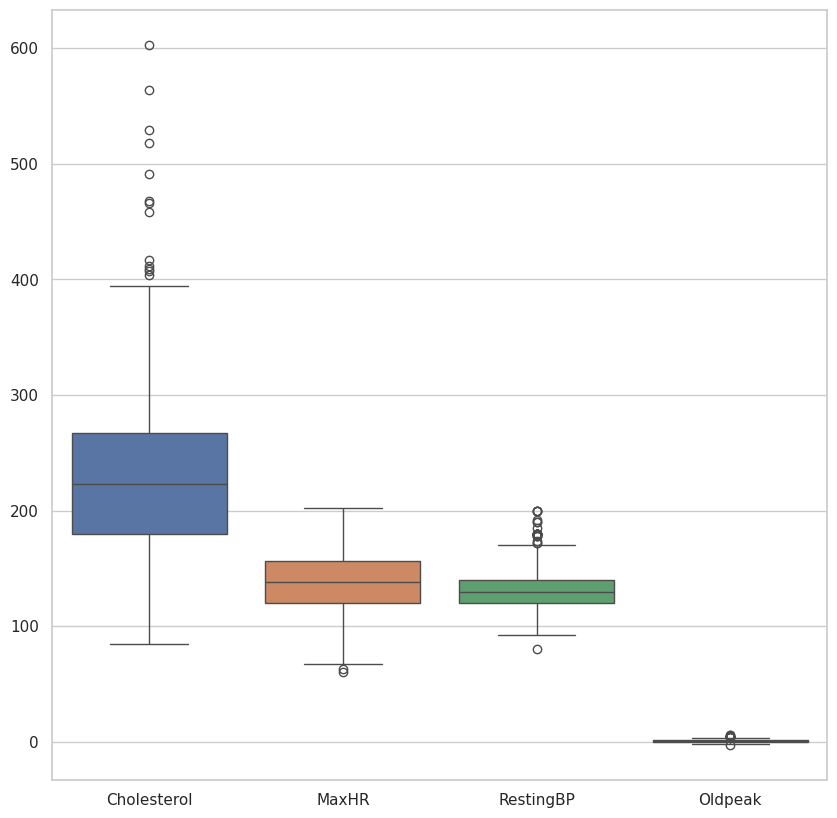

In [95]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data.loc[:, ['Cholesterol', 'MaxHR','RestingBP', 'Oldpeak']]);

# Handling Outliers in the Dataset
Outliers can have a significant impact on the performance of machine learning models and the accuracy of statistical analyses. In this section, we'll address outliers in our dataset and visualize the changes after their removal.

We'll be using a common method to handle outliers called the Interquartile Range (IQR) method. The steps involve identifying outliers based on the IQR and replacing them with values within a reasonable range.

In [96]:
def remove_outlier(data, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1 - iqr*1.5
    up = q3 + iqr*1.5
    data.loc[data[col_name] < low, col_name] = low
    data.loc[data[col_name] > up, col_name] = up
    
col_list = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col_name in col_list:
    remove_outlier(data, col_name)

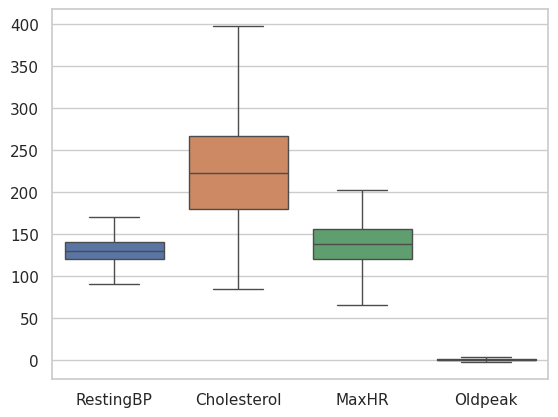

In [97]:
sns.boxplot(data=data.loc[:, col_list]);

# Feature Importance and Correlation Analysis
Understanding which features have the most impact on predicting heart disease is essential for building an effective predictive model. In this section, we'll explore two approaches to assess feature importance and correlation:

Mutual Information Scores: Mutual information measures the dependency between two variables, providing insight into how informative each feature is for predicting the target variable ('HeartDisease'). Higher mutual information scores indicate more important features.

Correlation Analysis: We'll examine the linear and non-linear correlations between features and the target variable. Linear correlation is computed using Pearson correlation, while non-linear correlation is assessed using Spearman correlation.

In [99]:
from sklearn.preprocessing import OrdinalEncoder

cat_features = list(data.select_dtypes(include=['object']).columns)

ordinal_encoder = OrdinalEncoder()
data[cat_features] = ordinal_encoder.fit_transform(data[cat_features])

In [103]:
import joblib

joblib.dump(ordinal_encoder, 'ordinal_encoder.pkl')

# loaded_preprocessing = joblib.load('ordinal_encoder.pkl')

In [101]:
X = data.drop('HeartDisease', axis=1)
y = pd.DataFrame(data['HeartDisease'])

In [102]:
from sklearn.feature_selection import mutual_info_regression

mi = pd.DataFrame(mutual_info_regression(X, y), columns=['MI Scores'], index=X.columns)
corr = pd.DataFrame(X[X.columns].corrwith(y['HeartDisease']),
                    columns=['Correlation'])
s_corr = pd.DataFrame(X[X.columns].corrwith(y['HeartDisease'], method='spearman'),
                      columns=['Spearman_Correlation'])

relation = mi.join(corr)
relation = relation.join(s_corr)
relation.sort_values(by='MI Scores', ascending=False)

,MI Scores,Correlation,Spearman_Correlation
ST_Slope,0.181070,-0.558541,-0.591679
ChestPainType,0.153339,-0.388592,-0.444583
Oldpeak,0.128893,0.409881,0.418583
ExerciseAngina,0.106896,0.495490,0.495490
MaxHR,0.099595,-0.401509,-0.405950
Cholesterol,0.072033,-0.058878,-0.092658
Sex,0.064903,0.305118,0.305118
FastingBS,0.058854,0.267994,0.267994
Age,0.051207,0.282012,0.289534
RestingBP,0.048976,0.116062,0.115851


1. Mutual Information (MI) Scores:
* Mutual information measures the dependency between two variables. In this case, you've calculated MI scores between each feature and the target variable 'HeartDisease.'
* Features with higher MI scores are more informative and have a stronger relationship with the target.
* According to the MI scores, 'ST_Slope' has the highest MI score, indicating a relatively strong relationship with 'HeartDisease.'
* 'ChestPainType' and 'Oldpeak' also have moderate MI scores, suggesting significant associations with 'HeartDisease.'
2. Pearson Correlation:
* Pearson correlation measures the linear relationship between two continuous variables.
* Negative values suggest a negative correlation (as one variable increases, the other decreases), while positive values suggest a positive correlation.
* According to Pearson correlation, 'ExerciseAngina' has the highest positive correlation with 'HeartDisease,' while 'ST_Slope' has the highest negative correlation.
3. Spearman Correlation:
* Spearman correlation measures the monotonic relationship between two variables, which means it captures both linear and non-linear associations.
* Like Pearson correlation, negative values suggest a negative correlation, and positive values suggest a positive correlation.
* According to Spearman correlation, 'ST_Slope' has the highest negative correlation, while 'ExerciseAngina' and 'Oldpeak' have the highest positive correlations.

In [104]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartDisease', axis=1)
y = pd.DataFrame(data['HeartDisease'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y)

In [105]:
cat_features = list(data.select_dtypes(include=['object']).columns)

ordinal_encoder = OrdinalEncoder()
X_train[cat_features] = ordinal_encoder.fit_transform(X_train[cat_features])
X_valid[cat_features] = ordinal_encoder.fit_transform(X_valid[cat_features])

In [106]:
import pickle

with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(ord_enc, f)

# Model Training and Evaluation
In this section, we'll explore the performance of several machine learning models for the task of heart failure prediction. We'll train each model on the preprocessed training data and evaluate their accuracy on the validation set.

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_valid)
print(f"Accuracy score: {round(accuracy_score(y_pred, y_valid)*100, 2)}")

Accuracy score: 88.59


# Cross-Validation for Model Evaluation
In this section, we will use cross-validation to assess the performance of our machine learning model more comprehensively. Cross-validation helps us obtain a better estimate of a model's performance by splitting the training data into multiple subsets.

## Repeated Stratified K-Fold Cross-Validation
We will employ the Repeated Stratified K-Fold Cross-Validation technique, which combines stratified sampling and k-fold cross-validation. This approach ensures that each fold maintains the same class distribution as the entire dataset.

In [117]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

scores = cross_val_score(rfc, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Mean of cross validation scores: {scores.mean()*100}")

Mean of cross validation scores: 85.36265647811638


# Hyperparameter Tuning with Grid Search
Hyperparameter tuning is a crucial step in optimizing machine learning models for better performance. We can utilize Grid Search, a systematic approach to search for the best combination of hyperparameters for a given model.

## Grid Search for Random Forest Classifier
In this section, we perform hyperparameter tuning for the Random Forest Classifier (RFC) model. We aim to find the best hyperparameters that maximize the model's accuracy.

In [120]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth":[5, 10, 20, 30, None],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf":[1, 2, 4],
    "max_features":['log2','sqrt', 'auto'],
    "n_estimators":[50, 100, 200, 300, 400, 500]
    }

rfc_grid = GridSearchCV(rfc, parameters, cv=cv, scoring='accuracy')
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30, None],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             scoring='accuracy')

In [123]:
rfc_grid.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [124]:
best_rf_model = rfc_grid.best_estimator_

In [ ]:
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Model Evaluation and Classification Metrics
After training and hyperparameter tuning, it's essential to evaluate the model's performance and understand its classification capabilities. In this section, we assess the Random Forest Classifier (RFC) model's effectiveness.

## Model Predictions
First, let's make predictions on the validation data using the optimized RFC model:

In [126]:
rfc_pred = rfc_grid.predict(X_valid)
rfc_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1])

In [128]:
round(accuracy_score(rfc_pred, y_valid) * 100, 2)

87.5

## Classification Report
To gain more insight into the model's performance, we generate a classification report. This report includes important classification metrics such as precision, recall, F1-score, and support for each class:

In [130]:
from sklearn.metrics import classification_report

report_svc = pd.DataFrame(classification_report(y_valid, rfc_pred,
                                                output_dict=True,
                                                target_names=rfc_grid.classes_))
report_svc

,0,1,accuracy,macro avg,weighted avg
precision,0.893333,0.862385,0.875,0.877859,0.876177
recall,0.817073,0.921569,0.875,0.869321,0.875000
f1-score,0.853503,0.890995,0.875,0.872249,0.874287
support,82.000000,102.000000,0.875,184.000000,184.000000


## Confusion Matrix
Visualizing the confusion matrix helps us understand how the model's predictions align with the actual class labels. We create a heatmap of the confusion matrix for better visualization:

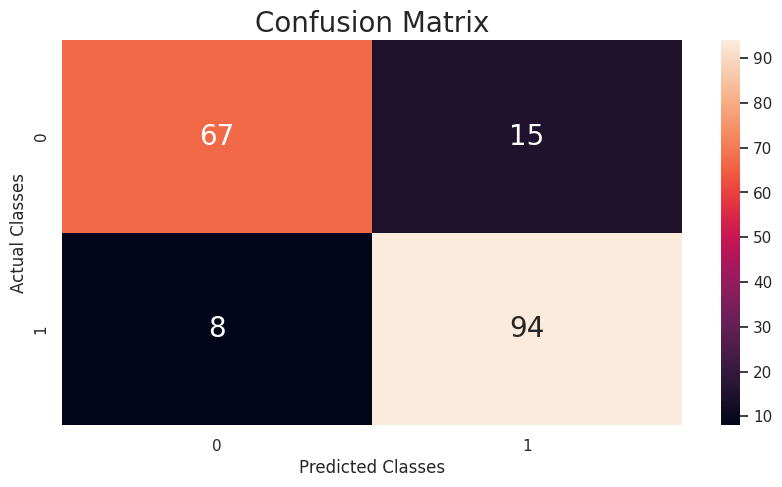

In [131]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, rfc_pred)
cm_dataframe = pd.DataFrame(cm, columns=[rfc_grid.classes_], index=[rfc_grid.classes_])

plt.figure(figsize = (10,5))
p = sns.heatmap(cm_dataframe, annot=True, fmt="d", annot_kws={"fontsize":20})
p.set_title('Confusion Matrix', fontsize=20)
p.set_xlabel('Predicted Classes')
p.set_ylabel('Actual Classes');

# Conclusion
In this notebook, we embarked on a comprehensive analysis of heart disease prediction using machine learning techniques. We started by exploring the dataset, performing data preprocessing, handling outliers, and conducting feature engineering. This initial phase allowed us to prepare the data for model building effectively.

We employed Random Forest machine learning model, and model's performance was evaluated using accuracy score and cross-validation to ensure robustness. We further optimized the RFC model by fine-tuning hyperparameters using GridSearchCV. The final RFC model exhibited impressive predictive capabilities on the validation data.

Additionally, we generated classification metrics, including precision, recall, F1-score, and support, to gain a deeper understanding of the model's performance on each class. The confusion matrix provided insights into the true positives, true negatives, false positives, and false negatives for each class.

Our analysis showcases the potential of machine learning in predicting heart disease based on patient characteristics and health attributes. The final RFC model can serve as a valuable tool for healthcare practitioners in early detection and risk assessment of heart disease.

Remember that the effectiveness of any predictive model depends on the quality of data and the choice of features. Further refinements and additional features could enhance the model's accuracy and robustness. Continual monitoring and updates to the model are essential to ensure its relevance in the ever-evolving field of healthcare.

We hope this notebook serves as a valuable resource and inspires further research and applications in the field of medical data analysis and heart disease prediction. Thank you for joining us on this journey of data exploration and machine learning.

If you have any questions or would like to explore more, please feel free to reach out and continue this exciting journey in data science and healthcare analytics!